<a href="https://colab.research.google.com/github/kartk/ML/blob/main/Decision_Trees_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pptree

In [2]:
import numpy as np
from typing import List, Tuple
from ppbtree import print_tree

# *Creating Data*

1)  For a given value of k, m, (number of features, number of data points), write a function to generate a trainingdata set based on the above scheme.

In [3]:
class Node:
  def __init__(self, data):
    self.left = None
    self.right = None
    self.data = data
  def pretty_print(self):
      print_tree(self,nameattr="data")


class DecisionTree:
  def __init__(self, k:int, m:int )-> None:
    self.data = self.datagenerator(k,m)
    self.tree = None
    self.k = k
    self.m = m

  def datagenerator(self, k:int, m:int)->List[List[int]]:
    """
    Input:
      k: number of features
      m: number of data points
    Returns:
      Numpy array of size (m,k)
    """
    data = []
    w_den = sum([np.power(0.9, i) for i in range(2, k+1)])
    for i in range(m):
      X = [np.random.choice([1,0], p=[0.5, 0.5])]
      for j in range(1,k):
        X.append(np.random.choice([X[j-1], 1-X[j-1]], p = [0.75, 0.25]))
      X.append(X[1] if (sum([ np.power(0.9, j)/w_den * X_j for j, X_j in enumerate(X[1:])]) >= 0.5) else (1 - X[1]))
      data.append(X)
    return np.array(data)

  def regenerate_data(self, k=None, m=None):
    self.data = self.datagenerator(k if k else self.k , m if m else self.m)

  def entropy(self, vector:np.array)->np.array:
    P_0 = (vector == 0).sum(0) / len(vector)
    P_1 = (vector == 1).sum(0) / len(vector)
    H_Y = - P_0 * np.log2(P_0) - P_1 * np.log2(P_1)
    return H_Y

  def fit(self, data):
    # print(data)
    X, Y = data[:,:-1], data[:,-1]
    if ((Y == 0).sum(0) == len(Y) or (Y == 1).sum(0) == len(Y)):
      print("returning")
      return Node("Y=0") if (Y == 0).sum(0) == len(Y) else Node("Y=1")
    # Calculating H(Y)
    H_Y = self.entropy(Y)

    # # Calculating H(Y|X)
    cond_X_Y = []
    for i in range(X.shape[1]):
      P_X_0 = (X[:,i] == 0).sum(0) / len(X[:,i])
      P_X_1 = (X[:,i] == 1).sum(0) / len(X[:,i])
      # print(Y[np.where(X[:,i]==0)])
      # print(Y[np.where(X[:,i]==1)])
      H_Y_X_0 = max(0, self.entropy(Y[np.where(X[:,i]==0)]))
      H_Y_X_1 = max(0, self.entropy(Y[np.where(X[:,i]==1)]))
      # print(f"{i} {H_Y_X_0} {H_Y_X_1}")
      cond_X_Y.append(P_X_0 * H_Y_X_0 + P_X_1 * H_Y_X_1)
    IG = H_Y - cond_X_Y
    print(IG)
    # print(H_Y)
    # print(cond_X_Y)
    # print(IG)
    max_IG = np.argmax(IG)
    print(max_IG)
    print()
    print("fitting 0")
    node = Node(max_IG)
    node.left = self.fit(data[np.where(data[:,max_IG] == 0)])
    print("fitting 1")
    node.right = self.fit(data[np.where(data[:,max_IG] == 1)])
    return node
  def train(self):
    self.tree=self.fit(self.data)
  
  def get_y(self, vector, node):
    if type(node.data) == str :
      return int(node.data[-1])
    if vector[node.data] == 0:
      return self.get_y(vector, node.left)
    else:
      return self.get_y(vector, node.right)


  def predict(self):
    if self.tree is None:
      print("Model not trained yet!! Run train() before predict ")
      return
    correct_count = 0
    y = []
    for i in self.data:
      y.append(self.get_y(i, self.tree))
    return y
  
  def error(self):
    y_hat = self.predict()
    y = self.data[:, -1]
    return 1 - (y_hat == y).sum(0) / len(y)



In [4]:
dt = DecisionTree(4, 30)

In [5]:
dt.data

array([[0, 0, 1, 1, 0],
       [1, 1, 1, 0, 1],
       [1, 1, 1, 1, 1],
       [1, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [1, 1, 1, 0, 1],
       [0, 0, 0, 0, 1],
       [1, 0, 1, 0, 1],
       [0, 0, 0, 1, 1],
       [0, 0, 1, 1, 0],
       [1, 1, 1, 0, 1],
       [1, 1, 0, 1, 1],
       [0, 0, 0, 0, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [0, 1, 0, 1, 1],
       [0, 0, 1, 1, 0],
       [1, 1, 0, 1, 1],
       [1, 1, 1, 0, 1],
       [1, 1, 0, 0, 0],
       [1, 1, 0, 0, 0],
       [1, 1, 1, 0, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [1, 1, 1, 0, 1],
       [1, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1]])

In [6]:
dt.train()

[2.64451609e-02 2.02858107e-05 1.28416105e-03 3.57281001e-03]
0

fitting 0
[0.         0.01722008 0.54085208 0.16859063]
2

fitting 0
[0.         0.28103611 0.         0.0430684 ]
1

fitting 0
returning
fitting 1
[0. 0. 0. 1.]
3

fitting 0
returning
fitting 1
returning
fitting 1
returning
fitting 1
[0.         0.04841568 0.26687815 0.10917034]
2

fitting 0
[0.       0.291692 0.       0.291692]
1

fitting 0
returning
fitting 1
[0.         0.         0.         0.97095059]
3

fitting 0
returning
fitting 1
returning
fitting 1
returning


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in log2
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars


In [7]:
dt.tree.pretty_print()

      ┌Y=1
    ┌1┤
    | | ┌Y=0
    | └3┤
    |   └Y=1
  ┌2┤
  | └Y=0
 0┤
  |   ┌Y=1
  | ┌1┤
  | | | ┌Y=0
  | | └3┤
  | |   └Y=1
  └2┤
    └Y=1


In [23]:
y = dt.predict()

In [24]:

y

[1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1]

In [8]:
e = dt.error()

In [9]:
e

0.0

Q1 4)

In [13]:
def error_f(dt:DecisionTree, N:int):
  error_array = []
  for i in range(N):
    dt.regenerate_data()
    error_array.append(dt.error())
  return sum(error_array) / len(error_array)


In [18]:
error_f(dt, 1000)

0.1396333333333334

In [13]:
np.arange(200, 10000, 500)

array([ 200,  700, 1200, 1700, 2200, 2700, 3200, 3700, 4200, 4700, 5200,
       5700, 6200, 6700, 7200, 7700, 8200, 8700, 9200, 9700])

In [14]:
import matplotlib.pyplot as plt

200
700
1200
1700
2200
2700
3200
3700
4200
4700
5200
5700
6200
6700
7200
7700
8200
8700
9200
9700


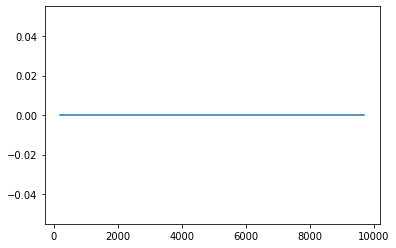

In [15]:
error_array = []
for i in np.arange(200, 10000, 500):
  print(i)
  error_array.append(error_f(dt, i))
plt.plot(np.arange(200, 10000, 500), error_array)


In [110]:
sum([1,2,3])/len([1,2,3])

2.0

In [16]:
error_array

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [17]:
error_f(dt,1000)

0.0